# Learn Pytorch via a linear regression model
In this excercise, you will learn tensorflow in steps. 

NOTE: There are seven questions, which include fixing code issues (marked by TODO), implementing functions (please see `implementation.py`), and answering questions. Please read instructions carefully.




In [ ]:
# If use google colab, mount the working directory there. 
from google.colab import drive
drive.mount('/content/drive')

# NOTE: you need to use your own path to add the implementation to the python path 
# so you can import functions from implementation.py
sys.path.append('/content/drive/MyDrive/cs137assignments/assignment1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# A bit of setup
import numpy as np
import torch
import matplotlib.pyplot as plt
import sys

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


## Get to know `torch` through a few simple examples

### <span style="color:red">Question 1 (4 points):</span>
You need to run all cells below and make necessary changes to avoid errors. 

### Pytorch basics
Pytorch use tensors to store scalars, vectors, matrices, and tensors. Here is the introduction webpage of pytorch: https://pytorch.org/tutorials/ . The few cells below show you a few simple operations on pytorch arrays. 

In [ ]:
# Get the shape of a tensor: 

a = torch.tensor([1, 2, 3], dtype=torch.float32)

print('a has shape: ', a.size())


# If `b = [1, 1, 1]` has the same shape as a, then a + b should work, 
# TODO: the line below has an error, please fix it. 

b = torch.tensor([1, 1, 1])
print("a + b is: ", a + b)


a has shape:  torch.Size([3])
a + b is:  tensor([2., 3., 4.])


In [ ]:
# broadcasting: adding `a` to each row of `c`
# `a` and `c` has different shapes, but `a`'s shape matches the last 
# dimension of `c`, so we can still add them together -- it is equivalent to 
# repeat `a` along the first dimension and then add it to `c`. 


a = torch.tensor([1, 2, 3], dtype=torch.float32).reshape((3,1))
c = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=torch.float32)

print("Adding a to rows of c gives:")
print(torch.add(a,c))

# TODO: broadcasting: adding `a` to each COLUMN of `c` so that `a+c` is the tensor in 
# `result`

result = torch.tensor([[ 2.,  3.,  4.], [ 6.,  7.,  8.], [10., 11., 12.]])
diff = torch.sum(torch.abs(a + c - result))

if diff > 1e-6:
    raise Exception("The calculation is wrong. The correct result should be \n" + str(result))

print("Adding a to columns of c gives:")
print(a + c)


Adding a to rows of c gives:
tensor([[ 2.,  3.,  4.],
        [ 6.,  7.,  8.],
        [10., 11., 12.]])
Adding a to columns of c gives:
tensor([[ 2.,  3.,  4.],
        [ 6.,  7.,  8.],
        [10., 11., 12.]])


In [ ]:
# take the sum along a dimension 

c = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=torch.float32)

print('Sum up c along rows:', torch.sum(c, axis=1)) # the `axis` specifies the dimension to be ``reduced''

# TODO: sum up c along columns
c_col_sum = torch.sum(c,axis=0)

result = torch.tensor([12, 15, 18], dtype=torch.float32)
print('Sum up b along columns should be ', result) # the `axis` specifies the dimension to be ``reduced''

diff = torch.sum(torch.abs(c_col_sum - result))
if diff > 1e-6:
    raise Exception("The calculation is wrong")

print("The calculation is correct")


# similar functions are torch.max, torch.logsumexp


Sum up c along rows: tensor([ 6., 15., 24.])
Sum up b along columns should be  tensor([12., 15., 18.])
The calculation is correct


In [ ]:
# matrix multiplication 



# Use this line, otherwise it doesn't work.
b = torch.tensor([[1, 1, 1], [1, 1, 1]]).reshape((6,1))
print('b has shape: ', b.size())

# 
# TODO: multiply the matrix `b` to the vector `c`. The line below does not work
# for the matrix calculation below. The shape is incorrect, and the data type 
# does not match b either. Can you fix it? 
c = torch.tensor([[2, 2, 2]]) 

print('c has shape: ', c.size())

print(torch.matmul(b, c))


b has shape:  torch.Size([6, 1])
c has shape:  torch.Size([1, 3])
tensor([[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        [2, 2, 2]])



## Learning `torch` through a regression task

### Implement  functions for a linear regression model 

### <span style="color:red">Question 2 (3 points):</span>
Please implement a linear regression model in `implementation.regression_func`. The empty function has detailed instructions. The following code helps you check correctness. 

/content/drive/MyDrive/cs137assignments/assignment1/implementation.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(x, dtype = torch.float32), torch.tensor(y, dtype = torch.float32)


loss beocmes  2.1993744  after  1  iterations.
loss beocmes  0.12779471  after  101  iterations.
loss beocmes  0.093688525  after  201  iterations.
loss beocmes  0.091567785  after  301  iterations.
loss beocmes  0.09143593  after  401  iterations.
loss beocmes  0.091427706  after  501  iterations.
loss beocmes  0.091427185  after  601  iterations.
loss beocmes  0.09142717  after  701  iterations.
loss beocmes  0.091427155  after  801  iterations.
loss beocmes  0.091427185  after  901  iterations.
loss becomes  0.091427185  after  1000  iterations.
(w, b) =  (tensor([[0.3022]], requires_grad=True), tensor([1.0482], requires_grad=True))


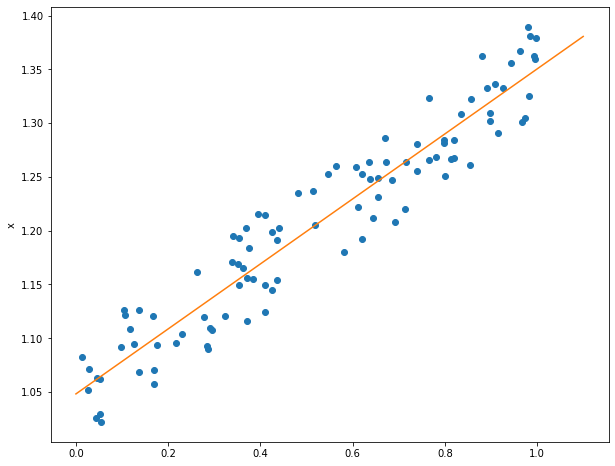

[3.2 7.2]


In [ ]:

from implementation import regression_func

x = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
w = torch.tensor([1, 1], dtype=torch.float32, requires_grad = True)
b = torch.tensor(0.2, dtype=torch.float32, requires_grad = True)

y_hat = regression_func(x, w, b)

# y_hat should be [3.2, 7.2]
print(y_hat.detach().numpy())

diff = torch.sum(torch.abs(y_hat - torch.tensor([3.2, 7.2])))
if diff > 1e-6:
    raise Exception("The calculation is incorrect.")



### <span style="color:red">Question 3 (3 points):</span>

Please implement a loss function in  `implementation.loss_func`. The empty function has detailed instructions. The following code helps you check correctness.

In [ ]:
from implementation import loss_func

# TODO: you need to fix an issue in this line, otherwise it does not work with the loss function
y = torch.tensor([3, 7],dtype = torch.float32)

loss = loss_func(y, y_hat)

# the loss should be 0.08
print(loss)

diff = torch.sum(torch.abs(loss - 0.08))
if diff > 1e-6:
    raise Exception("The calculation is incorrect.")




tensor(0.0800, grad_fn=<DotBackward0>)


### <span style="color:red">Question 4 (2 points):</span>

The following code block shows a simple computation graph of the calculation of `var4`. Which of the three variables (`var1`, `var2`, `var3`) are not shown in this computation graph? Please give the reason.  

Answer: var3,because the required_grad of var3 is False.


In [ ]:
!pip install torchviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=55b1f7742069e76df1d245fddacb33d67e416d0b26a985245187f0cbb58cc52f
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


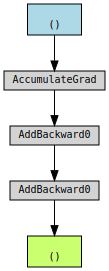

In [ ]:
# Check the computation graph. 
# NOTE: when you have multiple runs, remember to choose the correct run to display the graph
# %tensorboard --logdir runs

import torchviz


var1 = torch.tensor(1.0, requires_grad = True)
var2 = 5
var3 = torch.tensor(3.0, requires_grad = False)

var4 = var1 + var2 + var3


torchviz.make_dot(var4)

### <span style="color:red">Question 5 (2 points):</span>
Please show the computation graph of your loss calculation. The following code is a simple example of showing computation graph. Can you show the computation graph of `loss` from your model?

NOTE: this is another chance for you to check the correctness of your implementation. If your implementation is wrong, you will also lose points from this question. 

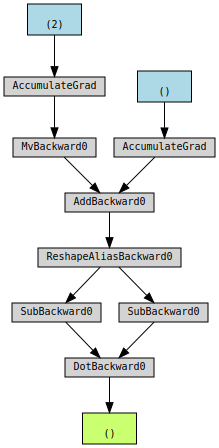

In [ ]:
# TODO: please write code to show the computation graph of `loss`. 
torchviz.make_dot(loss)

### <span style="color:red">Question 6 (2 points):</span>

Please fix issues in the following two code blocks. 

In [ ]:
# Check gradients of parameters

x = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
w = torch.tensor([1, 1], dtype=torch.float32, requires_grad = True)
b = torch.tensor(0.2, dtype=torch.float32, requires_grad = True)

y_hat = regression_func(x, w, b)
loss  = loss_func(y, y_hat)

# TODO: uncomment the following line so that torch computes gradients and stores them in `.grad`
loss.backward()

dl_dwb = [w.grad, b.grad]

if w.grad is None or b.grad is None:
    raise Exception("No gradient is computed for w or b")

# gradient with respect to w and b
print(dl_dwb)

[tensor([1.6000, 2.4000]), tensor(0.8000)]


In [ ]:
# Update model parameters in one optimization step
# TODO: Can you fix the following to lines, so `w` will be updated by the optimizer ?
w = torch.tensor([1, 1], dtype=torch.float32, requires_grad = True)
b = torch.tensor(0.2, dtype=torch.float32, requires_grad = True)

# note that the learning rate is 1.0
optimizer = torch.optim.SGD([w, b], lr=1.0)
optimizer.zero_grad()

y_hat = regression_func(x, w, b)
loss  = loss_func(y, y_hat)

loss.backward()

optimizer.step()

# Check the result below. Note that the calculation is: w <- w - dw * learning_rate; 
# it is subtraction, not addtion.
print(w)
print(b)

diff = torch.sum(torch.abs(w - torch.tensor([1.0, 1.0])))
if diff < 1e-6:
    raise Exception("w is not updated by the optimizer.")

tensor([-0.6000, -1.4000], requires_grad=True)
tensor(-0.6000, requires_grad=True)


### Train the regression model

Now we can implement a regression model. We use data with one feature only so we can plot the data easily. Assume the feature matrix is `x_np` and the label is `y_np`. 


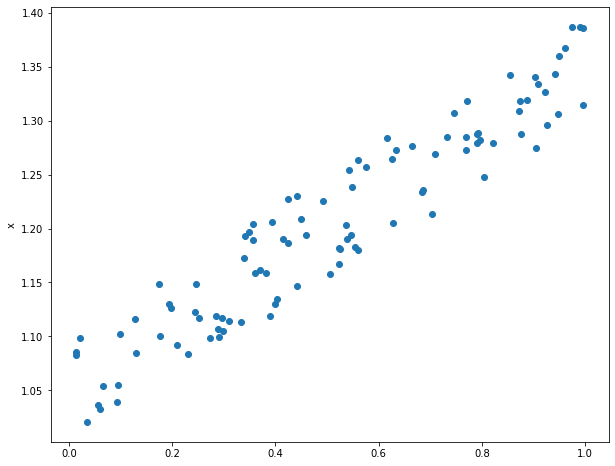

In [ ]:
# plot the data before fitting the model. 
# numpy values
N = 100
x_np = np.random.random_sample([N, 1]).astype(np.float32)
y_np = (np.squeeze(x_np.dot([[0.3]])) + 1.0 + 0.1 * np.random.random_sample([N])).astype(np.float32)

plt.plot(np.squeeze(x_np), y_np, 'o')
plt.ylabel('y')
plt.ylabel('x')
plt.show()


In [ ]:
from implementation import train_lr

# You may want to use a small lambda the regularization weight
lamb = 0.01
x_np = torch.tensor(x_np)
y_np = torch.tensor(y_np).reshape(-1)
w, b = train_lr(x=x_np, y=y_np, lamb=lamb)

print('(w, b) = ', (w, b))

# the result should be similar to (0.3, 1.0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/content/drive/MyDrive/cs137assignments/assignment1/implementation.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(x, dtype = torch.float32), torch.tensor(y, dtype = torch.float32)


loss beocmes  1.2278352  after  1  iterations.
loss beocmes  0.12590666  after  101  iterations.
loss beocmes  0.099561736  after  201  iterations.
loss beocmes  0.097435914  after  301  iterations.
loss beocmes  0.09726445  after  401  iterations.
loss beocmes  0.09725059  after  501  iterations.
loss beocmes  0.09724943  after  601  iterations.
loss beocmes  0.097249396  after  701  iterations.
loss beocmes  0.09724935  after  801  iterations.
loss beocmes  0.097249344  after  901  iterations.
loss becomes  0.09724935  after  1000  iterations.
(w, b) =  (tensor([[0.3075]], requires_grad=True), tensor([1.0463], requires_grad=True))


### <span style="color:red">Question 7 (4 points):</span>
Please implement the `implementation.train_lr` function, which trains a linear regression model.  

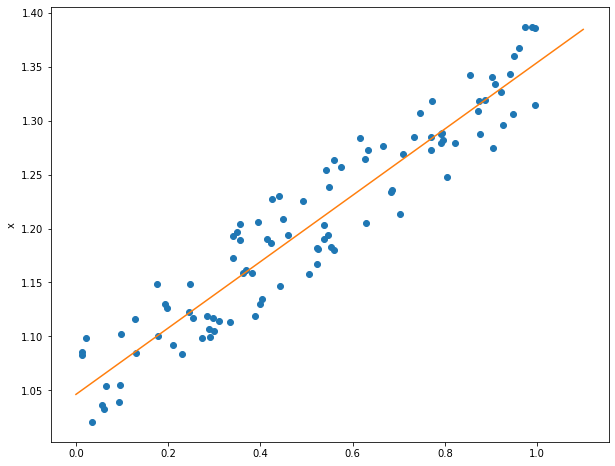

In [ ]:
# Plot the result

w_np = w.detach().numpy()
b_np = b.detach().numpy()

x_line = np.arange(12) / 10.0
y_line = x_line * np.squeeze(w_np) + b_np

plt.plot(x_np, y_np, 'o')
plt.plot(x_line, y_line)
plt.ylabel('y')
plt.ylabel('x')
plt.show()


# Please check whether the trained model fit the data (the line roughly cross data points). 
# If your model does not fit the data well, your model training is probably not successful.  
